<a href="https://colab.research.google.com/github/Sulaiman-Nedal/Deutsche_telekom_cellular_coverage/blob/main/Analysis_of_Deutsche_telekom's_cellular_network_coverage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!! pip install basemap


['Requirement already satisfied: basemap in /usr/local/lib/python3.10/dist-packages (1.4.1)',
 'Requirement already satisfied: basemap-data<1.4,>=1.3.2 in /usr/local/lib/python3.10/dist-packages (from basemap) (1.3.2)',
 'Requirement already satisfied: pyshp<2.4,>=1.2 in /usr/local/lib/python3.10/dist-packages (from basemap) (2.3.1)',
 'Requirement already satisfied: matplotlib<3.9,>=1.5 in /usr/local/lib/python3.10/dist-packages (from basemap) (3.8.0)',
 'Requirement already satisfied: pyproj<3.7.0,>=1.9.3 in /usr/local/lib/python3.10/dist-packages (from basemap) (3.6.1)',
 'Requirement already satisfied: packaging<24.0,>=16.0 in /usr/local/lib/python3.10/dist-packages (from basemap) (23.2)',
 'Requirement already satisfied: numpy<1.27,>=1.21 in /usr/local/lib/python3.10/dist-packages (from basemap) (1.26.4)',
 'Requirement already satisfied: contourpy>=1.0.1 in /usr/local/lib/python3.10/dist-packages (from matplotlib<3.9,>=1.5->basemap) (1.3.1)',
 'Requirement already satisfied: cycl

In [ ]:
import pandas as pd

# Load the data from the CSV file
data = pd.read_csv('262.csv', header=None)

# Assign column names based on the description provided
data.columns = [
    'radio', 'mcc', 'net', 'area', 'cell', 'unit', 'lon', 'lat',
    'range', 'samples', 'changeable', 'created', 'updated', 'averageSignal'
]


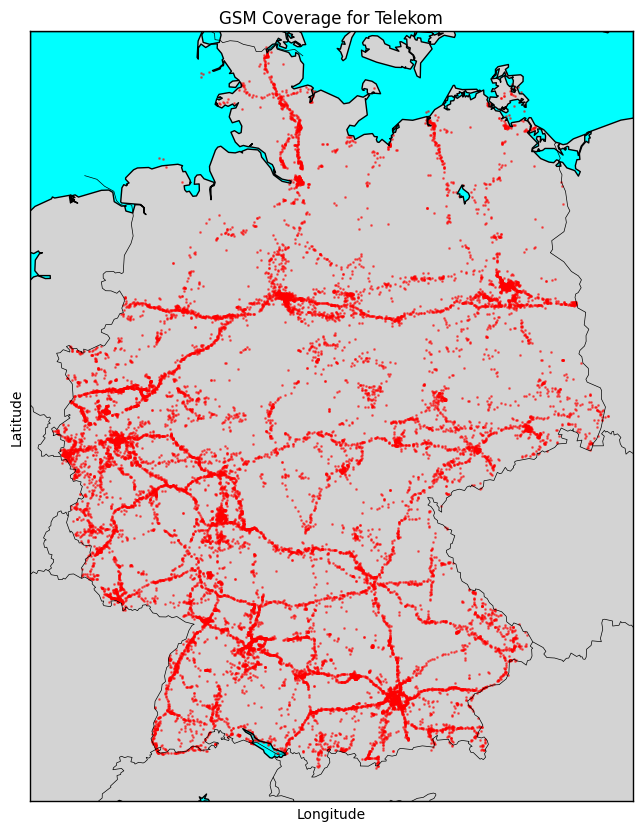

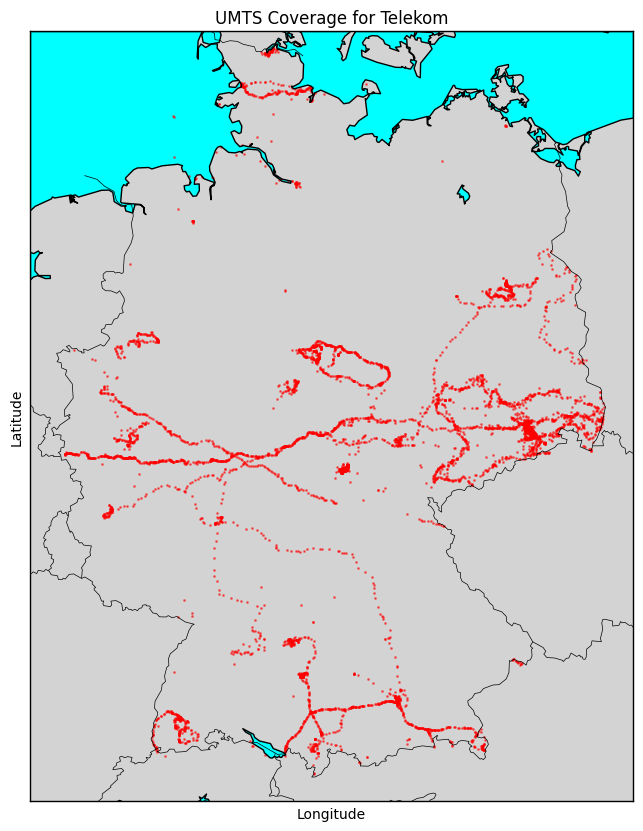

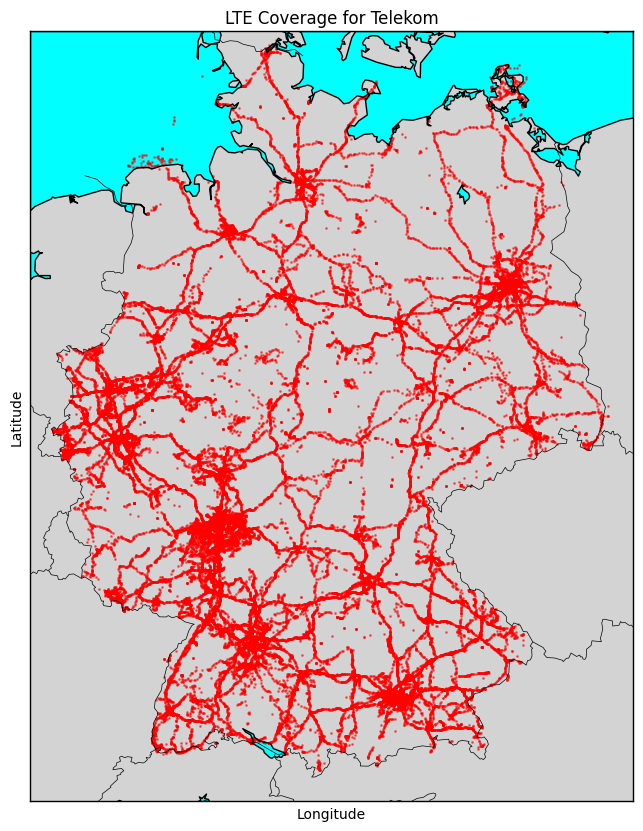

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# Define a function to plot the data
def plot_coverage_basemap(data, technology, provider_code, provider_name):
    filtered_data = data[(data['radio'] == technology) & (data['net'] == provider_code)]

    # Extract longitude and latitude
    lons = filtered_data['lon'].values
    lats = filtered_data['lat'].values

    # Plotting the map
    plt.figure(figsize=(10, 10))
    m = Basemap(projection='merc', llcrnrlat=47.0, urcrnrlat=55.0, llcrnrlon=5.5, urcrnrlon=15.5, resolution='i')
    m.drawcoastlines()
    m.drawcountries()
    m.drawmapboundary(fill_color='aqua')
    m.fillcontinents(color='lightgray', lake_color='aqua')

    # Convert lat/lon to map projection coordinates
    x, y = m(lons, lats)
    m.scatter(x, y, s=1, color='red', alpha=0.5)

    plt.title(f'{technology} Coverage for {provider_name}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

# Define provider codes and names
providers = {
    1: 'Telekom',
}

# Define technologies
technologies = ['GSM', 'UMTS', 'LTE']

# Generate plots for each combination of technology and provider
for technology in technologies:
    for provider_code, provider_name in providers.items():
        plot_coverage_basemap(data, technology, provider_code, provider_name)
